# Decision Tree Fraud Data Asiignment 

# Import necessary libraries 

In [6]:
import pandas as  pd 
import numpy as np 
from sklearn import datasets 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
from sklearn.metrics import classification_report 
from sklearn import preprocessing 
from sklearn.metrics import accuracy_score 

# Import the data 

In [7]:
df=pd.read_csv('/Users/viswanathareddy/Assignments /Decisition Tree/Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Data understanding 

In [8]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
df.shape

(600, 6)

In [11]:
df['income']='<=3000'

In [12]:
df.loc[df['Taxable.Income']>=30000,'income']='Good'
df.loc[df['Taxable.Income']<=30000,'income']='Risky'

In [13]:
df['income'].unique()

array(['Good', 'Risky'], dtype=object)

In [15]:
df.rename(columns={'Marital.Status':'Marital_Status','City.Population':'City_Population','Work.Experience':'Work_Experience'},inplace=True)

In [16]:
df.head()

,Undergrad,Marital_Status,Taxable.Income,City_Population,Work_Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good


In [17]:
colnames=list(df.columns)

In [18]:
colnames

['Undergrad',
 'Marital_Status',
 'Taxable.Income',
 'City_Population',
 'Work_Experience',
 'Urban',
 'income']

In [20]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [21]:
df['Undergrad']=le.fit_transform(df['Undergrad'])
df['Marital_Status']=le.fit_transform(df['Marital_Status'])
df['Urban']=le.fit_transform(df['Urban'])

In [22]:
x=df.drop('income',axis=1)
y=df['income']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
pd.crosstab(y_pred,y_test)

income,Good,Risky
row_0,,
Good,95,0
Risky,0,25


In [26]:
accuracy_score(y_pred,y_test)

1.0

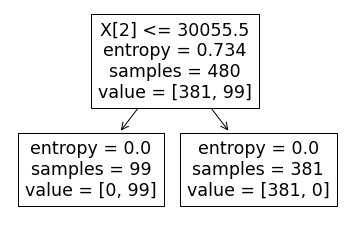

In [27]:
tree.plot_tree(model);

In [29]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [30]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [31]:
y_predict=model_gini.predict(x_test)

In [32]:
pd.crosstab(y_predict,y_test)

income,Good,Risky
row_0,,
Good,95,0
Risky,0,25


In [33]:
accuracy_score(y_predict,y_test)

1.0

In [35]:
from sklearn.model_selection import KFold , cross_val_score
kfold=KFold(n_splits=10)

In [39]:
from sklearn.ensemble import BaggingClassifier
cart=DecisionTreeClassifier(criterion='entropy')
bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=10,random_state=7)
bag_results=cross_val_score(bagging_model,x,y,cv=kfold)

bag_results_1=cross_val_score(bagging_model,x_train,y_train,cv=kfold)

In [40]:
print(bag_results.mean())#Full data

0.9983333333333334


In [41]:
print(bag_results_1.mean())#spilt data

0.9979166666666666
